# <span style="color:#d62d41">ML</span>

### <span style="color:#060f54">Name:</span>  <span style="color:#601bcf">Aryan Amish</span>
### <span style="color:#060f54">Roll No.:</span> <span style="color:#601bcf">20S115893</span>
### <span style="color:#060f54">Reg No.:</span> <span style="color:#601bcf">40110122</span>

## <span style="color:#e8812c">Dicision Tree</span>

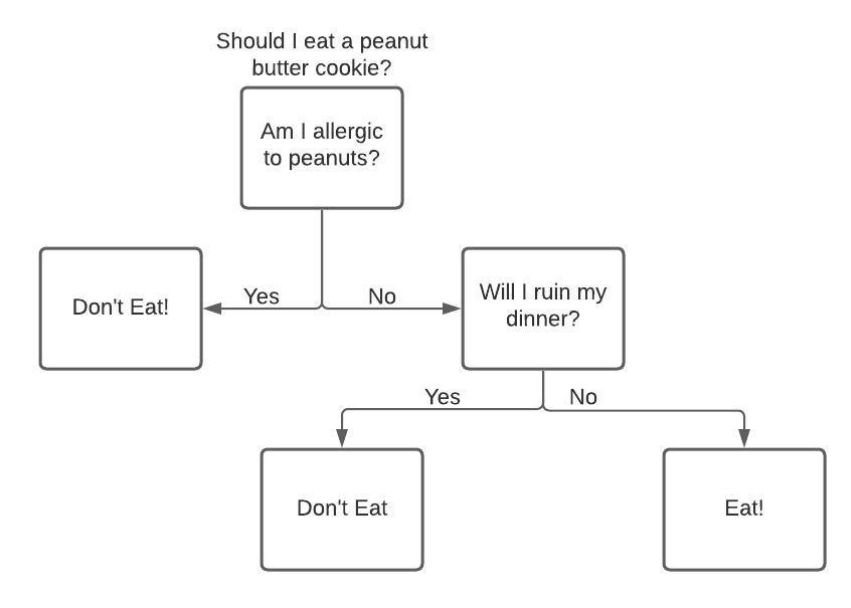

## Entropy
Measure of randomness

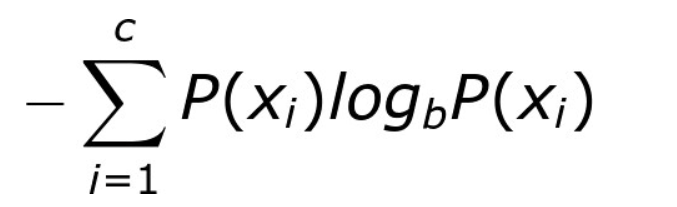

## Informationgain
P(S) -[weightedAvg + entropy(PA)]

which ever is greater we use that attribute for first classification

weightedavg = number of a/number of sample space * E(A) + 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../day2/diabetes.csv')
df.columns = df.columns.str.lower()

In [3]:
t = 3
mean = round(df['bmi'].mean(),2)
std = df['bmi'].std()
for i in range(len(df['bmi'])):
    z = (df['bmi'][i]-mean)/std
    if z > t:
        df['bmi'][i] = mean
df

C:\Users\Aryan anish\AppData\Local\Temp\ipykernel_16000\1879721811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][i] = mean


pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

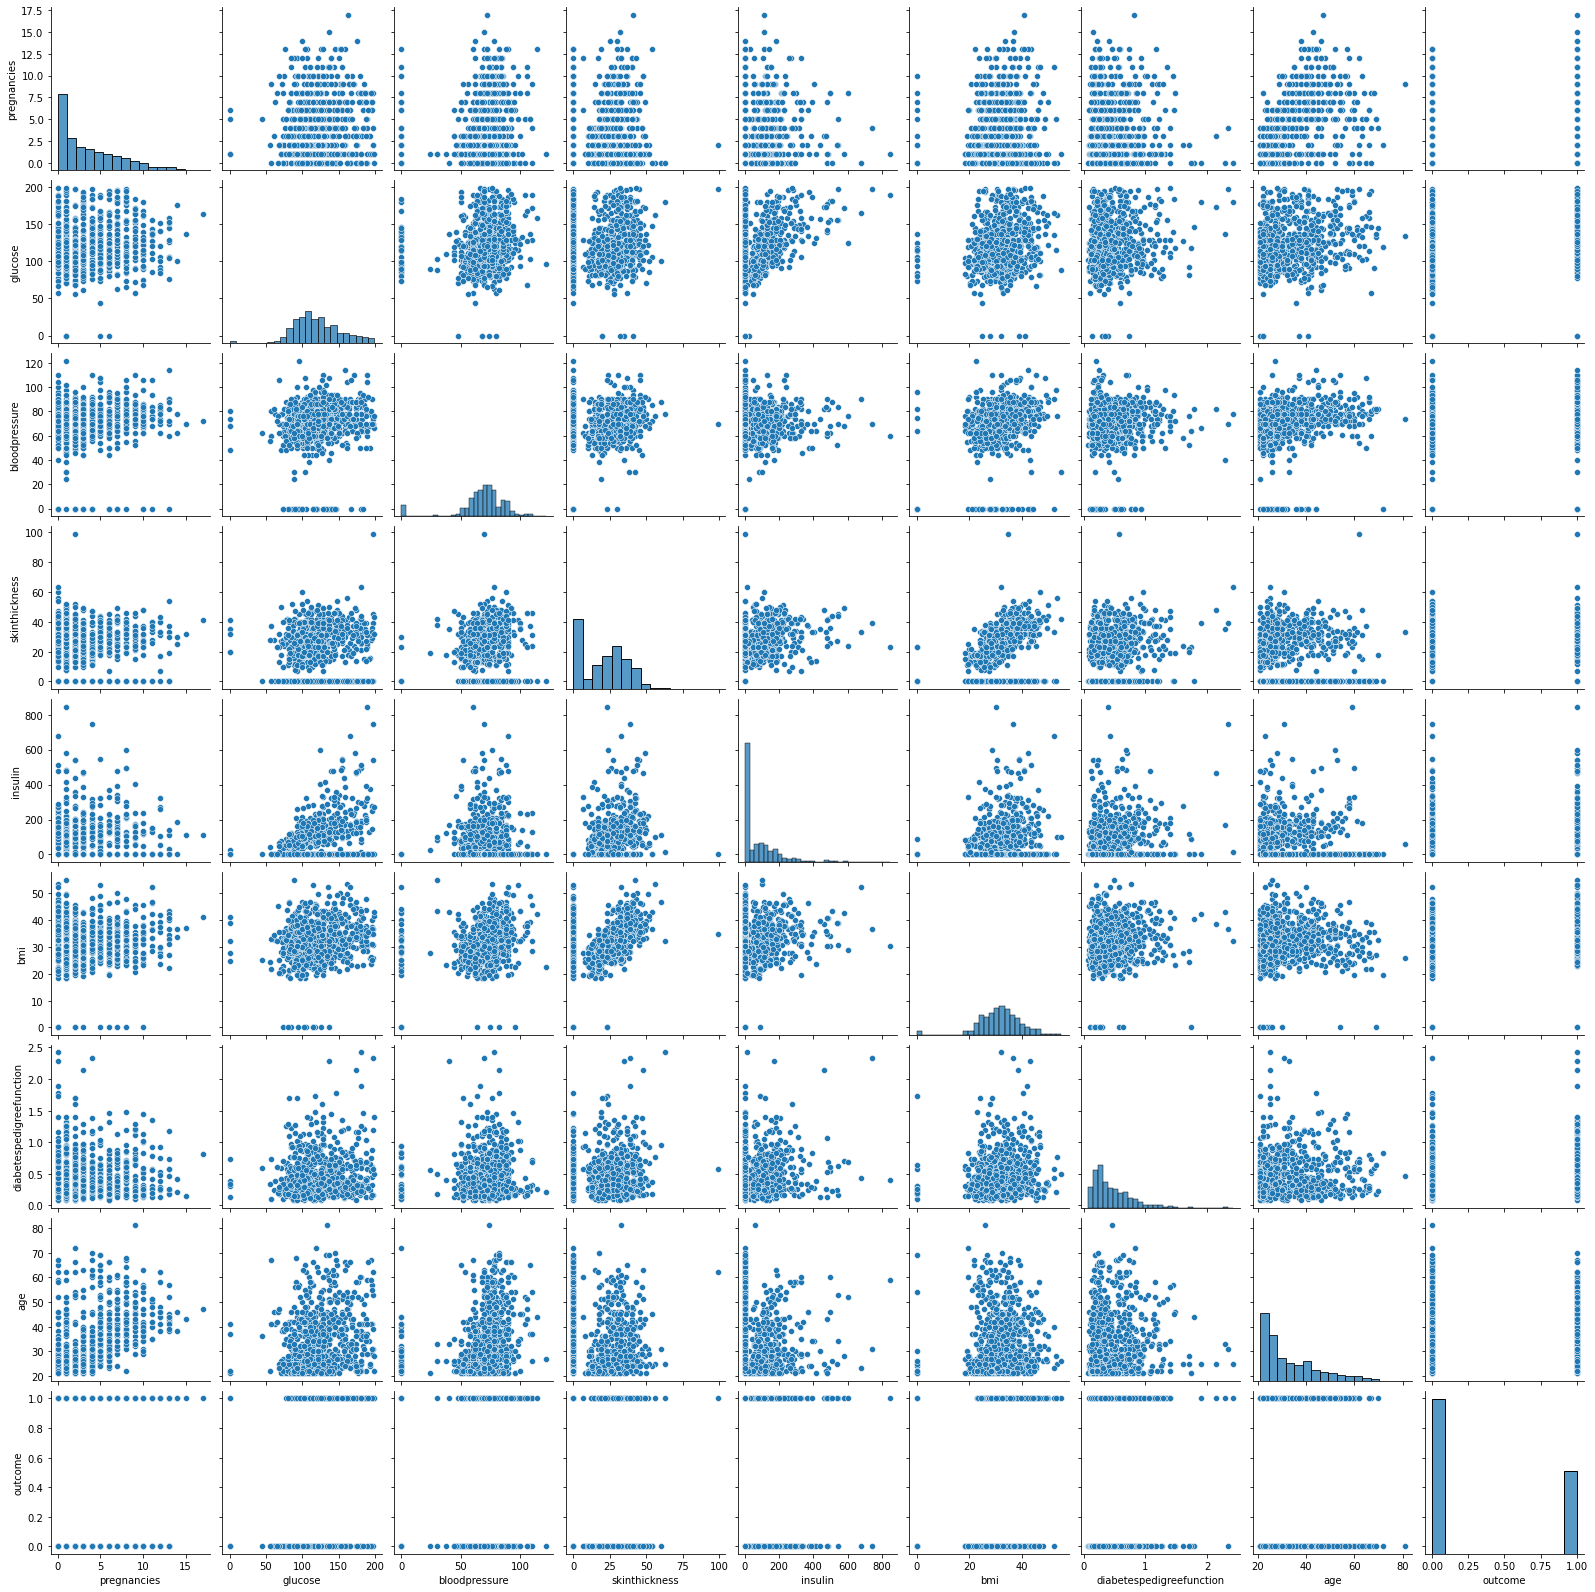

In [4]:
sns.pairplot(df)

### Box plot graphs is good for finding outliers

<AxesSubplot:>

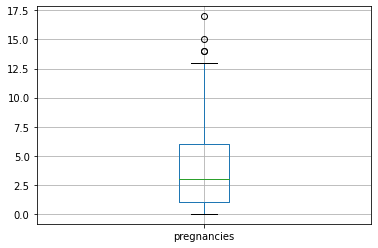

In [5]:
df.boxplot(['pregnancies'])

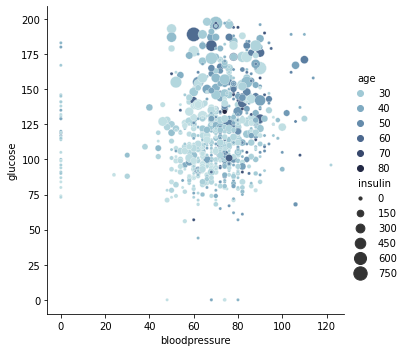

In [6]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data=df, x='bloodpressure', y='glucose', hue="age", size="insulin",palette=cmap, sizes=(10, 200))

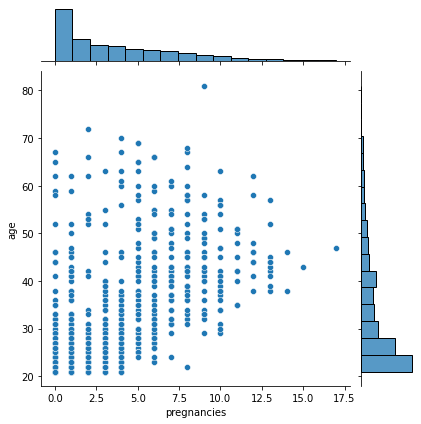

In [7]:
sns.jointplot(data=df, x='pregnancies', y='age')

<AxesSubplot:xlabel='pregnancies', ylabel='insulin'>

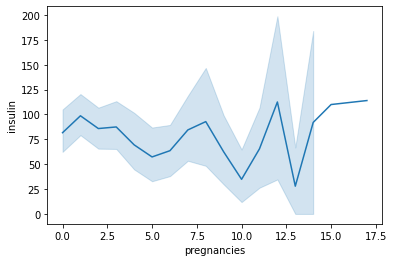

In [8]:
sns.lineplot(x='pregnancies', y='insulin', data=df)

In [9]:
df.iloc[:,-1:]

outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

X = df.iloc[:,0:-1]
Y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10)
# y_test

mt_dicision = DecisionTreeClassifier()
mt_dicision.fit(X_train, y_train)
mt_prediction = mt_dicision.predict(X_test)

print(f"Accuracy = {accuracy_score(mt_prediction, y_test)}")

Accuracy = 0.7402597402597403


In [11]:
from dtreeviz.trees import dtreeviz
# fig = plt.figure(figsize=(25,20))
viz = dtreeviz(mt_dicision, X.to_numpy(), Y.to_numpy().reshape(768), target_name="outcome", feature_names=df.columns)
viz

g:\machine_learning_workshop\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
from pickle5 import pickle

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')